In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # downsampling the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # data scaling and centering
from sklearn.svm import SVC # support vector machine for classification
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA # perform PCA to plot the data

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, alpha=0.01, iterations=1000):
        self.lr = learning_rate
        self.alpha = alpha
        self.iterations = iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        samples, features = X.shape

        self.w = np.zeros(features)
        self.b = 0

        for _ in range(self.iterations):
            for i, x_i in enumerate(X):
                condition = y_[i] * (x_i @ self.w - self.b) >= 1
                if condition:
                    self.w -= self.lr * 2 * self.alpha * self.w
                else:
                    self.w -= self.lr * (2 * self.alpha * self.w - y_[i] * x_i)
                    self.b -= self.lr * y_[i]

    def predict(self, X):
        return np.sign(X @ self.w - self.b)

[0.5583391  0.33059814] -1.1639999999999826


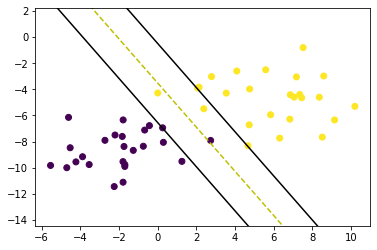

In [ ]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=2, random_state=40)
y = np.where(y == 0, -1, 1)

classifier = SVM()
classifier.fit(X, y, )

print(classifier.w, classifier.b)

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

def visualize_svm():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)


    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, classifier.w, classifier.b, 0)
    x1_2 = get_hyperplane_value(x0_2, classifier.w, classifier.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, classifier.w, classifier.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, classifier.w, classifier.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, classifier.w, classifier.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, classifier.w, classifier.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()

In [12]:
import itertools

n = 5
a = [[0 for i in range(5)] for j in range(n)]
m = 1000000
ind_m = []
for i in list(itertools.permutations(range(2 * n))):
  s = 0
  for j in i:
    if j < n:
      for y in range(n):
        a[j][y] = 1 - a[j][y]
    else:
      for x in range(n):
        a[x][j-n] = 1 - a[x][j-n]
    for x in range(n):
      for y in range(n):
        s+=a[x][y]
  if s < m:
    m = s
    ind_m = i 
print(m)
print(ind_m)

85
(0, 5, 1, 6, 2, 7, 3, 8, 4, 9)
